# Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split,cross_validate
from sklearn.decomposition import PCA #principle component analysis
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

#ML Models
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Preprocessing and Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('Data/bank-additional-full.csv', delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
col = "y"
value_counts = df[col].value_counts()
print(f"Column: {col}")
print(value_counts)

Column: y
no     36548
yes     4640
Name: y, dtype: int64


## Data Cleansing

## Check the null values in the data set.

In [5]:
# Check for null values in the DataFrame
null_counts = df.isnull().sum()
print(null_counts)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


According to the above result there is no any null value in any column.

## Check the Duplicate

In [6]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]

if num_duplicate_rows > 0:
    print(f"Number of duplicate rows: {num_duplicate_rows}")
    print("Sample duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 12
Sample duplicate rows:
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no     

In [7]:
# Remove duplicate rows
data_no_duplicates = df.drop_duplicates()

# Print the shape before and after removing duplicates
print("Shape before removing duplicates:", df.shape)
print("Shape after removing duplicates:", data_no_duplicates.shape)

#re assing the same name to data frame
df=data_no_duplicates

Shape before removing duplicates: (41188, 21)
Shape after removing duplicates: (41176, 21)


According the above result there are 10 duplicate raws in the data set and they have been removed.

## Check the NA values

In [8]:
# Check for NA values
na_counts = df.isna().sum()
print("NA value counts:")
print(na_counts)

NA value counts:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [9]:
categorical_columns = df.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    value_counts = df[col].value_counts()
    print(f"Column: {col}")
    print(value_counts)
    print("=" * 30)

Column: job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Column: marital
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
Column: education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
Column: default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
Column: housing
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
Column: loan
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64
Column: conta

In [10]:
#remove the unknown data from each category
# Drop the Job Occupations and Education that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)
df = df.drop(df.loc[df["marital"] == "unknown"].index)
df = df.drop(df.loc[df["education"] == "unknown"].index)
df = df.drop(df.loc[df["loan"] == "unknown"].index)
df = df.drop(df.loc[df["default"] == "unknown"].index)
df.shape

(30478, 21)

In [11]:
# Count the number of unique values in a specific column
#assume 999 means the client is not previousely contacted
unique_counts = df['pdays'].nunique()
print ("Unique values count :",unique_counts)

unique_values = df['pdays'].unique()
print ("Unique values :",unique_values)

# Replace 999 with -1 in 'Column1'
df['pdays'].replace(999, 0, inplace=True)

new_unique_values = df['pdays'].unique()
print ("New_Unique values :",new_unique_values)

Unique values count : 26
Unique values : [999   6   4   5   1   0   3  10   7   9  11   8   2  12  13  14  15  16
  21  17  18  22  25  26  19  27]
New_Unique values : [ 0  6  4  5  1  3 10  7  9 11  8  2 12 13 14 15 16 21 17 18 22 25 26 19
 27]


## Remove unnecessary columns

In [12]:
#remove undefined column and clean the data
model_df = df.drop(columns=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
model_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,yes


In [13]:
#rename y column name to subscribe
model_df.rename(columns = {'y':'subscribe'}, inplace = True)

## Identify the relationship of Target Variable and Numarical Variables

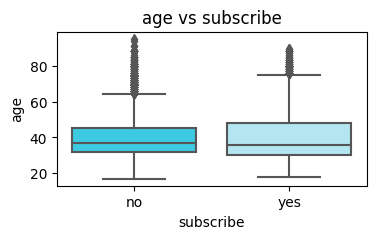

Number of outliers in age: 457


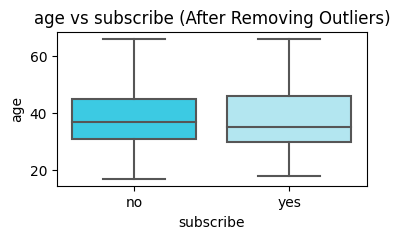

Shape after removing outliers: (30021, 16)


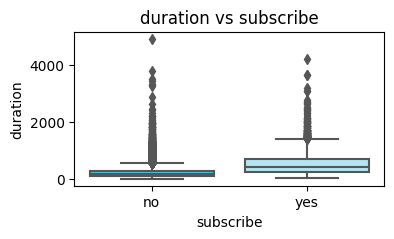

Number of outliers in duration: 2174


C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_20116\275476723.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_df_no_outliers = model_df_no_outliers[~outliers_mask]


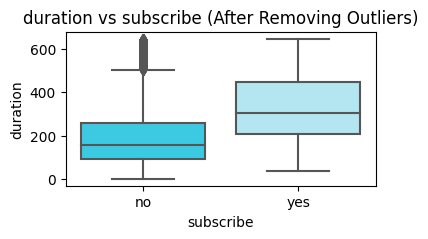

Shape after removing outliers: (27874, 16)


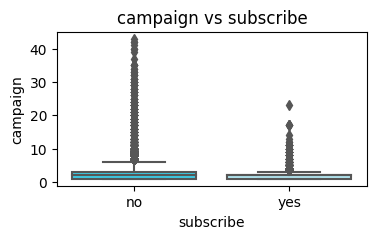

Number of outliers in campaign: 1675


C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_20116\275476723.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_df_no_outliers = model_df_no_outliers[~outliers_mask]


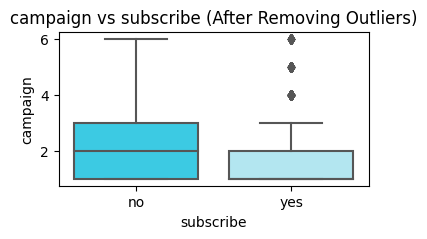

Shape after removing outliers: (26320, 16)


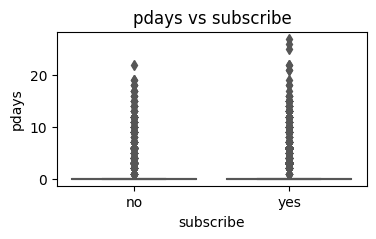

Number of outliers in pdays: 1296


C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_20116\275476723.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_df_no_outliers = model_df_no_outliers[~outliers_mask]


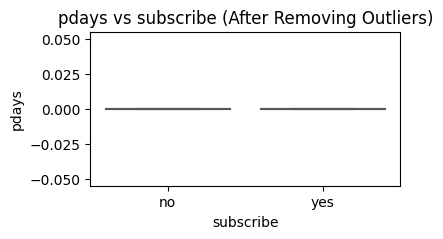

Shape after removing outliers: (25226, 16)


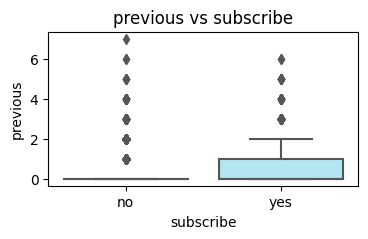

Number of outliers in previous: 4652


C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_20116\275476723.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_df_no_outliers = model_df_no_outliers[~outliers_mask]


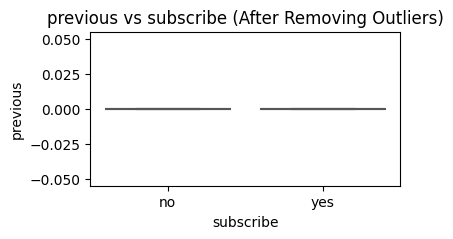

Shape after removing outliers: (22218, 16)
Shape after all outliers have been removed : (22218, 16)


In [14]:
# Plotting numerical variables against the target variable
numerical_columns = model_df.select_dtypes(include=["int64", "float64"]).columns

# Create a copy of the original DataFrame
model_df_no_outliers = model_df.copy()

for col in numerical_columns:
    custom_palette = ["#20DDFF", "#A9EDFA"]
    plt.figure(figsize=(4,2))
    sns.boxplot(x="subscribe", y=col, data=model_df,palette=custom_palette)
    plt.title(f"{col} vs subscribe")
    plt.show()

     # Calculate IQR
    Q1 = model_df[col].quantile(0.25)
    Q3 = model_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers_mask = (model_df[col] < lower_bound) | (model_df[col] > upper_bound)
    
    # Count outliers
    num_outliers = outliers_mask.sum()
    print(f"Number of outliers in {col}: {num_outliers}")
    
    # Remove outliers
    model_df_no_outliers = model_df_no_outliers[~outliers_mask]
    
    plt.figure(figsize=(4,2))
    sns.boxplot(x="subscribe", y=col, data=model_df_no_outliers,palette=custom_palette)
    plt.title(f"{col} vs subscribe (After Removing Outliers)")
    plt.show()

    # Display the shape after removing outliers
    print("Shape after removing outliers:", model_df_no_outliers.shape)
print("Shape after all outliers have been removed :", model_df_no_outliers.shape)


In [15]:
col = "previous"
value_counts = model_df[col].value_counts()
print(f"Column: {col}")
print(value_counts)

# Assuming your DataFrame is named model_df
previous_counts = model_df["previous"].value_counts()

# Get the total count of 0
count_0 = previous_counts.get(0, 0)

# Get the total count of other unique values
total_other_count = previous_counts.sum() - count_0

print(f"Total count of '0' in 'previouse' column: {count_0}")
print(f"Total count of other unique values in 'previouse' column: {total_other_count}")
print(f"As a percentage: {(total_other_count/count_0)*100}")

Column: previous
0    25826
1     3752
2      633
3      190
4       56
5       16
6        4
7        1
Name: previous, dtype: int64
Total count of '0' in 'previouse' column: 25826
Total count of other unique values in 'previouse' column: 4652
As a percentage: 18.01285526213893


In [16]:
col = "pdays"
value_counts = model_df[col].value_counts()
print(f"Column: {col}")
print(value_counts)

# Assuming your DataFrame is named model_df
pday_counts = model_df["pdays"].value_counts()

# Get the total count of 0
count_0 = pday_counts.get(0, 0)

# Get the total count of other unique values
total_other_count = pday_counts.sum() - count_0

print(f"Total count of '0' in 'pdays' column: {count_0}")
print(f"Total count of other unique values in 'pdays' column: {total_other_count}")
print(f"As a percentage: {(total_other_count/count_0)*100}")

Column: pdays
0     29182
3       381
6       363
4       102
2        53
9        53
7        50
12       50
5        43
10       40
13       33
11       25
15       22
1        21
14       17
8        13
16        8
17        6
18        5
22        3
19        3
21        2
25        1
26        1
27        1
Name: pdays, dtype: int64
Total count of '0' in 'pdays' column: 29182
Total count of other unique values in 'pdays' column: 1296
As a percentage: 4.441093824960593


According to the box plot of the pday vs subscribe and previous vs subscribe, it can be identified that most of the customers are approached for the first time. This means 96% of the pdays column and 82% previous column contained the value zero before removing the outliers. Hence after removing the outliers, both columns can be dropped from the data frame because all the values become the same.

In [17]:
model_df = model_df_no_outliers.drop(columns=['pdays','previous'])

In [18]:
#find the Success data and Unsuccess data record count
col = "subscribe"
value_counts = model_df[col].value_counts()
print(f"Column: {col}")
print(value_counts)


Column: subscribe
no     20731
yes     1487
Name: subscribe, dtype: int64


## Identify the relationship of Target Variable and Categorical Variables

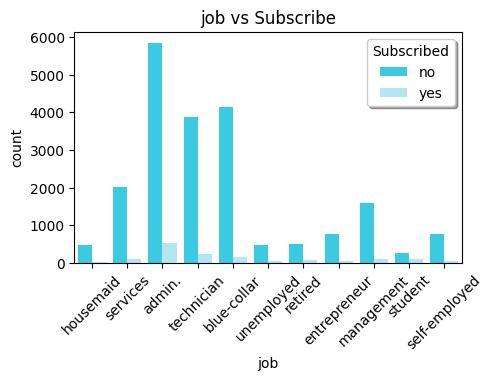

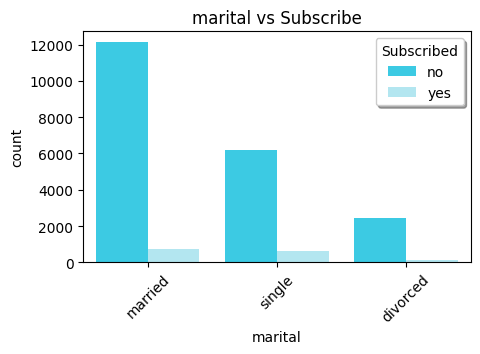

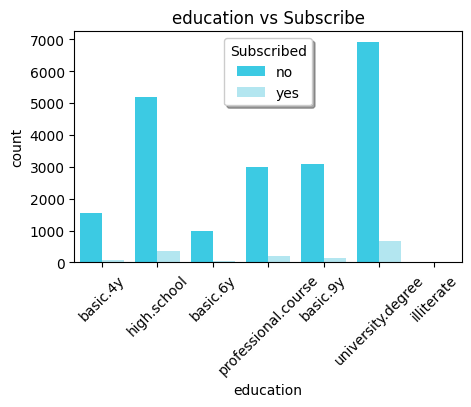

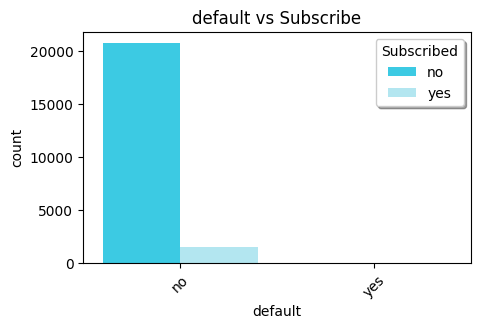

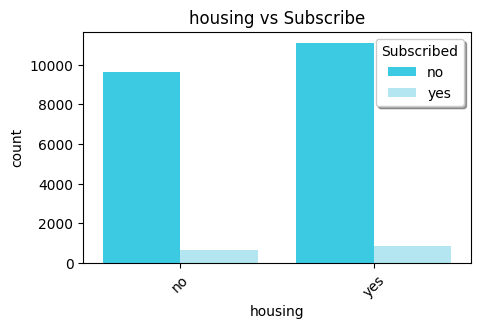

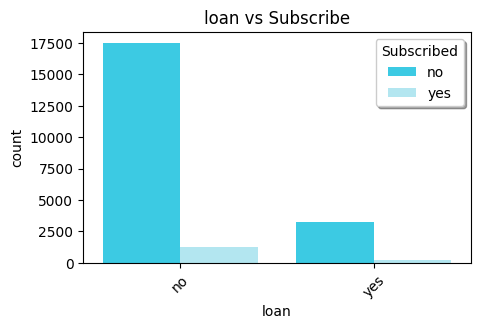

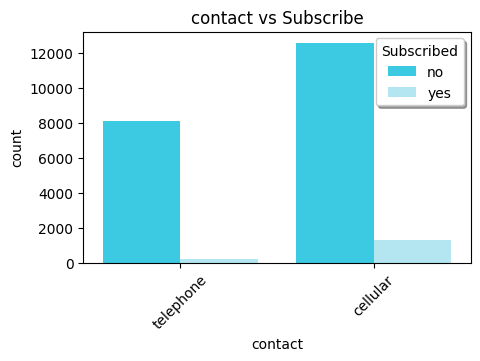

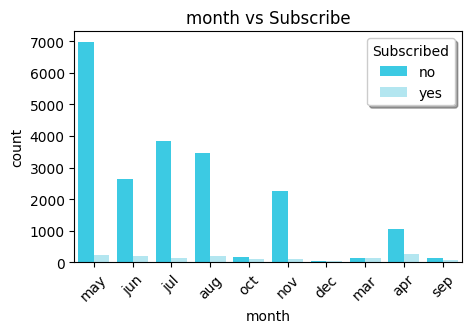

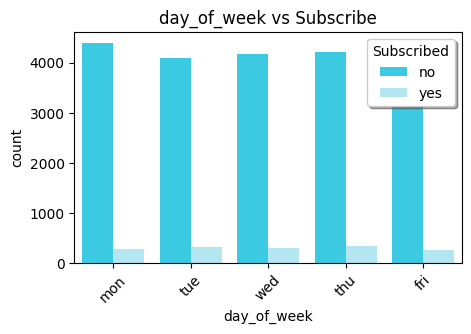

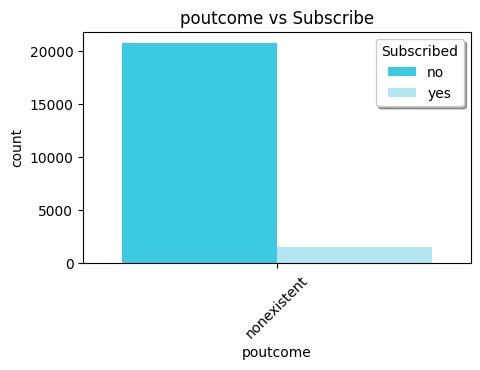

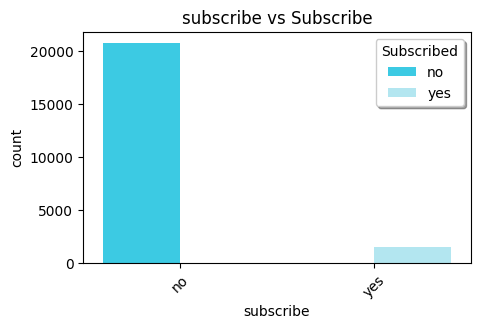

In [19]:
# Plotting categorical variables against the target variable
categorical_columns = model_df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    custom_palette = ["#20DDFF", "#A9EDFA"]
    sns.countplot(x=col, hue="subscribe", data=model_df, palette=custom_palette)
    plt.title(f"{col} vs Subscribe")
    plt.legend(title='Subscribed', ncol=1, fancybox=True, shadow=True)
    plt.xticks(rotation=45)
    plt.show()

In [20]:
# Plotting numerical variables against the target variable
numerical_columns = model_df.select_dtypes(include=["int64", "float64"]).columns
num_features = model_df[numerical_columns]
num_features

,age,duration,campaign
0,56,261,1
2,37,226,1
3,40,151,1
4,56,307,1
6,59,139,1
...,...,...,...
41180,36,254,2
41181,37,281,1
41184,46,383,1
41185,56,189,2


### Correlation of Numarical Variables

C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_20116\2498175533.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(model_df.corr(),annot=True,fmt='.2f')


<Axes: >

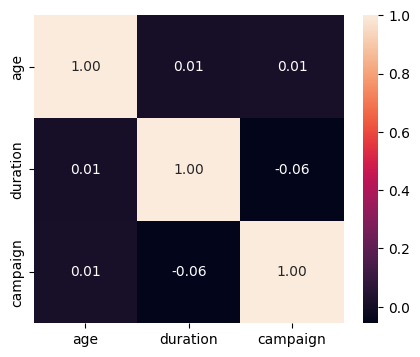

In [21]:
plt.figure(figsize=(5,4))
sns.heatmap(model_df.corr(),annot=True,fmt='.2f')

# Data Preparation for Model Fitting

## One Hot Encoding

In [22]:
categorical_columns = ['job', 'marital','education','default','housing','loan','poutcome','contact','month','day_of_week']

In [23]:
for col in model_df[categorical_columns].columns:
    print(col, ":", len(model_df[categorical_columns][col].unique()),'labels')

job : 11 labels
marital : 3 labels
education : 7 labels
default : 2 labels
housing : 2 labels
loan : 2 labels
poutcome : 1 labels
contact : 2 labels
month : 10 labels
day_of_week : 5 labels


In [24]:
cat_features = pd.get_dummies(model_df[categorical_columns])
cat_features.reset_index()

,index,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,4,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,6,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22213,41180,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
22214,41181,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
22215,41184,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
22216,41185,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [25]:
#Define the independant varible
x1=pd.concat([num_features.reset_index(drop=True),cat_features.reset_index(drop=True)],axis=1)

In [26]:
x1.shape

(22218, 48)

In [27]:
model_df['subscribe'] = model_df['subscribe'].replace({'yes': 1, 'no': 0})
target=model_df.subscribe
target.reset_index()

,index,subscribe
0,0,0
1,2,0
2,3,0
3,4,0
4,6,0
...,...,...
22213,41180,0
22214,41181,1
22215,41184,0
22216,41185,0


# Train Test Split without PCA

In [28]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, target, test_size=0.2, random_state=42)

In [29]:
#Scalling
scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

# Model Training

Here Random Forest  Classifier,  Gradient Boosting Algorithms (XGBoost, LightGBM, CatBoost),Support Vector Machines (SVM) with Class Weights, and Logistic Regression with Class Weights has been used for the classification due to the imbalance of the data set.

## RandomForestClassifier

In [30]:
# Calculate class proportions
total_samples = len(y1_train)
class_counts = y1_train.value_counts()
class_proportions = class_counts / total_samples


# Create a Random Forest classifier with class weights
class_weights = {0: 1 / class_proportions[0], 1: 1 / class_proportions[1]}
rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Train the model on the training data
rf_classifier.fit(x1_train, y1_train)

RandomForestClassifier(class_weight={0: 1.071885176697624,
                                     1: 14.911073825503356},
                       random_state=42)

In [31]:
# Make predictions on the test data
y1_pred = rf_classifier.predict(x1_test)

# Evaluate the model's performance
print(classification_report(y1_test, y1_pred))

accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y1_test, y1_pred)

print("Confusion Matrix:")
print(confusion)

# Extract TP, FP, TN, FN
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4149
           1       0.58      0.14      0.22       295

    accuracy                           0.94      4444
   macro avg       0.76      0.56      0.59      4444
weighted avg       0.92      0.94      0.92      4444

Accuracy: 0.9360936093609361
Confusion Matrix:
[[4120   29]
 [ 255   40]]
True Positives (TP): 40
False Positives (FP): 29
True Negatives (TN): 4120
False Negatives (FN): 255


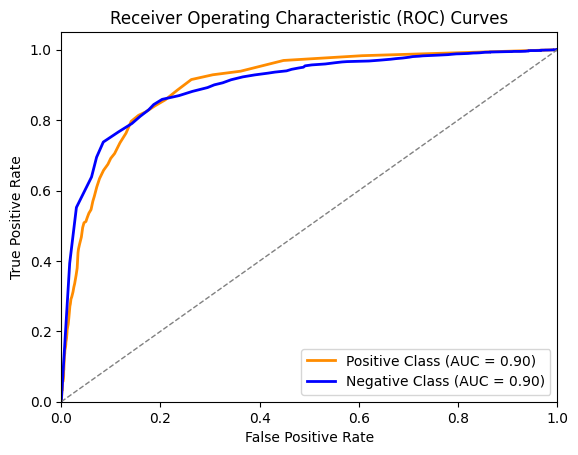

In [32]:
# Get predicted probabilities for both classes
y1_pred_proba = rf_classifier.predict_proba(x1_test)

# Calculate the ROC curve for both classes
fpr_positive, tpr_positive, _ = roc_curve(y1_test, y1_pred_proba[:, 1], pos_label=1)
fpr_negative, tpr_negative, _ = roc_curve(y1_test, y1_pred_proba[:, 0], pos_label=0)

# Calculate the ROC AUC for both classes
roc_auc_positive = auc(fpr_positive, tpr_positive)
roc_auc_negative = auc(fpr_negative, tpr_negative)

# Plot the ROC curves for both classes
plt.figure()
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=2, label=f'Positive Class (AUC = {roc_auc_positive:.2f})')
plt.plot(fpr_negative, tpr_negative, color='blue', lw=2, label=f'Negative Class (AUC = {roc_auc_negative:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

## Extreme Gradient Boosting Algorithms

In [33]:
# Calculate the ratio of negative class samples to positive class samples
negative_samples = (y1_train == 0).sum()
positive_samples = (y1_train == 1).sum()
class_weights = negative_samples / positive_samples

xgb_classifier = xgb.XGBClassifier(scale_pos_weight=class_weights, random_state=42)

In [34]:
# Train the model on the training data
xgb_classifier.fit(x1_train, y1_train)

# Make predictions on the test data
y1_pred = xgb_classifier.predict(x1_test)

# Evaluate the model's performance
print(classification_report(y1_test, y1_pred))

accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y1_test, y1_pred)

print("Confusion Matrix:")
print(confusion)


              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4149
           1       0.35      0.67      0.46       295

    accuracy                           0.90      4444
   macro avg       0.66      0.79      0.70      4444
weighted avg       0.93      0.90      0.91      4444

Accuracy: 0.8962646264626463
Confusion Matrix:
[[3786  363]
 [  98  197]]


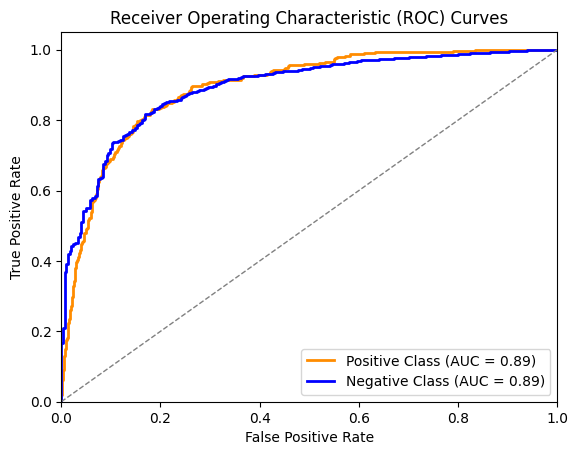

In [35]:
# Get predicted probabilities for both classes
y1_pred_proba = xgb_classifier.predict_proba(x1_test)

# Calculate the ROC curve for both classes
fpr_positive, tpr_positive, _ = roc_curve(y1_test, y1_pred_proba[:, 1], pos_label=1)
fpr_negative, tpr_negative, _ = roc_curve(y1_test, y1_pred_proba[:, 0], pos_label=0)

# Calculate the ROC AUC for both classes
roc_auc_positive = auc(fpr_positive, tpr_positive)
roc_auc_negative = auc(fpr_negative, tpr_negative)

# Plot the ROC curves for both classes
plt.figure()
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=2, label=f'Positive Class (AUC = {roc_auc_positive:.2f})')
plt.plot(fpr_negative, tpr_negative, color='blue', lw=2, label=f'Negative Class (AUC = {roc_auc_negative:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

## SVM

In [36]:
# Calculate class proportions
negative_samples = (y1_train == 0).sum()
positive_samples = (y1_train == 1).sum()
class_weights = {0: 1, 1: negative_samples / positive_samples}

# Create an SVM classifier with class weights
svm_classifier = SVC(class_weight=class_weights, probability=True,random_state=42)

# Train the model on the training data
svm_classifier.fit(x1_train, y1_train)

SVC(class_weight={0: 1, 1: 13.911073825503356}, probability=True,
    random_state=42)

In [37]:
# Make predictions on the test data
y1_pred = svm_classifier.predict(x1_test)

# Evaluate the model's performance
print(classification_report(y1_test, y1_pred))

accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y1_test, y1_pred)

print("Confusion Matrix:")
print(confusion)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      4149
           1       0.27      0.71      0.39       295

    accuracy                           0.86      4444
   macro avg       0.63      0.79      0.66      4444
weighted avg       0.93      0.86      0.88      4444

Accuracy: 0.8562106210621062
Confusion Matrix:
[[3597  552]
 [  87  208]]


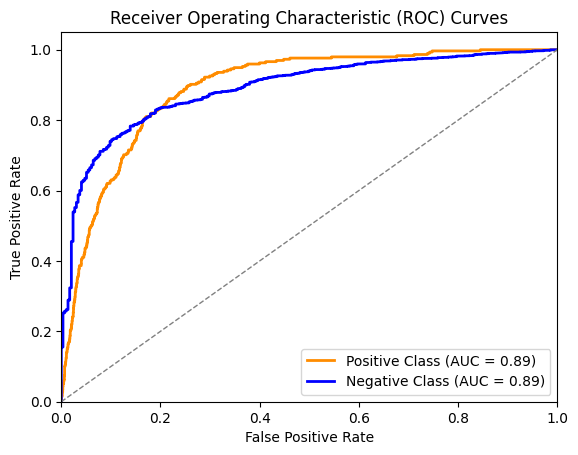

In [38]:
# Get predicted probabilities for both classes
y1_pred_proba = svm_classifier.predict_proba(x1_test)

# Calculate the ROC curve for both classes
fpr_positive, tpr_positive, _ = roc_curve(y1_test, y1_pred_proba[:, 1], pos_label=1)
fpr_negative, tpr_negative, _ = roc_curve(y1_test, y1_pred_proba[:, 0], pos_label=0)

# Calculate the ROC AUC for both classes
roc_auc_positive = auc(fpr_positive, tpr_positive)
roc_auc_negative = auc(fpr_negative, tpr_negative)

# Plot the ROC curves for both classes
plt.figure()
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=2, label=f'Positive Class (AUC = {roc_auc_positive:.2f})')
plt.plot(fpr_negative, tpr_negative, color='blue', lw=2, label=f'Negative Class (AUC = {roc_auc_negative:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

In [39]:
# Calculate class proportions
negative_samples = (y1_train == 0).sum()
positive_samples = (y1_train == 1).sum()
class_weights = {0: 1, 1: negative_samples / positive_samples}

# Create a Logistic Regression classifier with class weights
logreg_classifier = LogisticRegression(class_weight=class_weights, random_state=42)

# Train the model on the training data
logreg_classifier.fit(x1_train, y1_train)


LogisticRegression(class_weight={0: 1, 1: 13.911073825503356}, random_state=42)

In [40]:
# Make predictions on the test data
y1_pred = logreg_classifier.predict(x1_test)

# Evaluate the model's performance
print(classification_report(y1_test, y1_pred))

accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y1_test, y1_pred)

print("Confusion Matrix:")
print(confusion)

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      4149
           1       0.25      0.82      0.38       295

    accuracy                           0.82      4444
   macro avg       0.62      0.82      0.64      4444
weighted avg       0.94      0.82      0.86      4444

Accuracy: 0.8222322232223223
Confusion Matrix:
[[3411  738]
 [  52  243]]


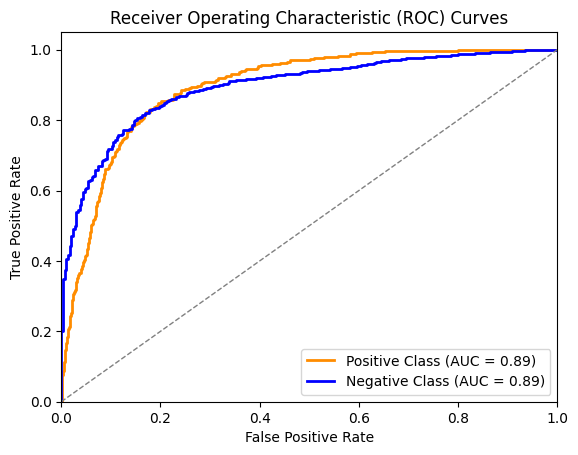

In [41]:
# Get predicted probabilities for both classes
y1_pred_proba = logreg_classifier.predict_proba(x1_test)

# Calculate the ROC curve for both classes
fpr_positive, tpr_positive, _ = roc_curve(y1_test, y1_pred_proba[:, 1], pos_label=1)
fpr_negative, tpr_negative, _ = roc_curve(y1_test, y1_pred_proba[:, 0], pos_label=0)

# Calculate the ROC AUC for both classes
roc_auc_positive = auc(fpr_positive, tpr_positive)
roc_auc_negative = auc(fpr_negative, tpr_negative)

# Plot the ROC curves for both classes
plt.figure()
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=2, label=f'Positive Class (AUC = {roc_auc_positive:.2f})')
plt.plot(fpr_negative, tpr_negative, color='blue', lw=2, label=f'Negative Class (AUC = {roc_auc_negative:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

Random Forest:

High Accuracy (93.61%): Random Forest performs well in correctly classifying instances overall.
Class 0 (No subscription): High precision (0.94) and recall (0.99) indicate that the model can identify non-subscribers accurately.
Class 1 (Subscription): Low precision (0.58) and recall (0.14) suggest that the model has difficulty identifying subscribers, leading to a lower F1-score (0.22).
Confusion Matrix: High number of false negatives (FN) for class 1 indicates that the model misses a significant portion of actual subscribers.

Extreme Gradient Boosting Algorithms:

Good Accuracy (89.63%): Gradient Boosting provides a balanced performance between precision and recall.
Class 0: High precision (0.97) and recall (0.91) indicate accurate identification of non-subscribers.
Class 1: Moderate precision (0.35) and recall (0.67) suggest better performance in identifying subscribers than Random Forest.
Confusion Matrix: Still a significant number of false negatives (FN) for class 1, indicating room for improvement.

Support Vector Machines (SVM):

Moderate Accuracy (85.62%): SVM provides a trade-off between accuracy, precision, and recall.
Class 0: High precision (0.98) and recall (0.87) show accurate identification of non-subscribers.
Class 1: Low precision (0.27) and moderate recall (0.71) suggest challenges in correctly identifying subscribers.
Confusion Matrix: Still a notable number of false negatives (FN) for class 1.

Logistic Regression:

Moderate Accuracy (82.22%): Logistic Regression provides relatively balanced performance.
Class 0: High precision (0.98) and moderate recall (0.82) indicate accurate identification of non-subscribers.
Class 1: Low precision (0.25) and recall (0.82) suggest difficulty in identifying subscribers.
Confusion Matrix: Moderate number of false negatives (FN) for class 1.


# Model Traning with PCA

## Train Test Split with PCA

## PCA for Dimension Reduction

PCA Analysis DF concat with the Numarical Varible Concatination

In [42]:
#Principle component analysis for 5 components
pca=PCA(n_components=5)
#fit the categorical  features
pca.fit(cat_features)

PCA(n_components=5)

In [43]:
pca_transformed=pca.transform(cat_features)
#PCA Data into Data frame
pca_analysis=pd.DataFrame(pca_transformed)
pca_analysis

,0,1,2,3,4
0,1.398997,0.199227,-0.378513,0.141867,-0.079376
1,0.935678,-1.043675,0.131682,-0.148219,0.648427
2,1.280466,0.329463,-0.078589,0.547356,0.308111
3,1.404083,0.128923,-0.150850,-0.121506,0.920731
4,1.242670,0.329781,-0.106087,0.417318,-0.051564
...,...,...,...,...,...
22213,-0.347559,0.901867,-0.463704,1.046430,0.279629
22214,-0.850121,-0.372316,-0.141181,1.088425,0.274490
22215,0.047198,0.510683,-1.160778,-0.341123,-0.273018
22216,-0.748623,-0.496121,-0.412247,0.704556,-0.107471


In [44]:
#Concatinate the PCA Feature and Numerical Features and create new data frame as independant varible
x2=pd.concat([num_features.reset_index(drop=True),pca_analysis.reset_index(drop=True)],axis=1)
x2


,age,duration,campaign,0,1,2,3,4
0,56,261,1,1.398997,0.199227,-0.378513,0.141867,-0.079376
1,37,226,1,0.935678,-1.043675,0.131682,-0.148219,0.648427
2,40,151,1,1.280466,0.329463,-0.078589,0.547356,0.308111
3,56,307,1,1.404083,0.128923,-0.150850,-0.121506,0.920731
4,59,139,1,1.242670,0.329781,-0.106087,0.417318,-0.051564
...,...,...,...,...,...,...,...,...
22213,36,254,2,-0.347559,0.901867,-0.463704,1.046430,0.279629
22214,37,281,1,-0.850121,-0.372316,-0.141181,1.088425,0.274490
22215,46,383,1,0.047198,0.510683,-1.160778,-0.341123,-0.273018
22216,56,189,2,-0.748623,-0.496121,-0.412247,0.704556,-0.107471


In [45]:
data_types = x2.dtypes
# Convert column names to strings
x2.columns = x2.columns.astype(str)

Training and Testing Split

In [46]:
np.random.seed(42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,target, test_size=0.2, random_state=42)

In [47]:
#Scalling
scaler = StandardScaler()
x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)

## RandomForestClassifier

In [48]:
# Calculate class proportions
total_samples = len(y2_train)
class_counts = y2_train.value_counts()
class_proportions = class_counts / total_samples


# Create a Random Forest classifier with class weights
class_weights = {0: 1 / class_proportions[0], 1: 1 / class_proportions[1]}
rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Train the model on the training data
rf_classifier.fit(x2_train, y2_train)

RandomForestClassifier(class_weight={0: 1.071885176697624,
                                     1: 14.911073825503356},
                       random_state=42)

In [49]:
# Make predictions on the test data
y2_pred = rf_classifier.predict(x2_test)

# Evaluate the model's performance
print(classification_report(y2_test, y2_pred))

accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y2_test, y2_pred)

print("Confusion Matrix:")
print(confusion)


              precision    recall  f1-score   support

           0       0.94      1.00      0.96      4149
           1       0.43      0.05      0.09       295

    accuracy                           0.93      4444
   macro avg       0.68      0.52      0.53      4444
weighted avg       0.90      0.93      0.91      4444

Accuracy: 0.9324932493249325
Confusion Matrix:
[[4129   20]
 [ 280   15]]


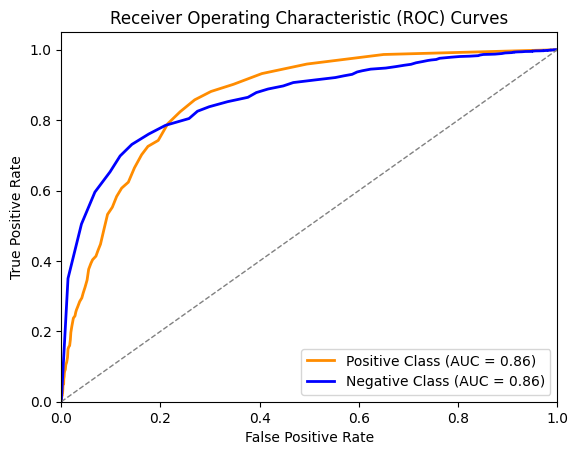

In [50]:
# Get predicted probabilities for both classes
y2_pred_proba = rf_classifier.predict_proba(x2_test)

# Calculate the ROC curve for both classes
fpr_positive, tpr_positive, _ = roc_curve(y2_test, y2_pred_proba[:, 1], pos_label=1)
fpr_negative, tpr_negative, _ = roc_curve(y2_test, y2_pred_proba[:, 0], pos_label=0)

# Calculate the ROC AUC for both classes
roc_auc_positive = auc(fpr_positive, tpr_positive)
roc_auc_negative = auc(fpr_negative, tpr_negative)

# Plot the ROC curves for both classes
plt.figure()
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=2, label=f'Positive Class (AUC = {roc_auc_positive:.2f})')
plt.plot(fpr_negative, tpr_negative, color='blue', lw=2, label=f'Negative Class (AUC = {roc_auc_negative:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

## Extreme Gradient Boosting Algorithms

In [51]:
# Calculate the ratio of negative class samples to positive class samples
negative_samples = (y2_train == 0).sum()
positive_samples = (y2_train == 1).sum()
class_weights = negative_samples / positive_samples

xgb_classifier = xgb.XGBClassifier(scale_pos_weight=class_weights, random_state=42)

In [52]:
# Train the model on the training data
xgb_classifier.fit(x2_train, y2_train)

# Make predictions on the test data
y2_pred = xgb_classifier.predict(x2_test)

# Evaluate the model's performance
print(classification_report(y2_test, y2_pred))

accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y2_test, y2_pred)

print("Confusion Matrix:")
print(confusion)


              precision    recall  f1-score   support

           0       0.96      0.89      0.93      4149
           1       0.27      0.54      0.36       295

    accuracy                           0.87      4444
   macro avg       0.62      0.72      0.64      4444
weighted avg       0.92      0.87      0.89      4444

Accuracy: 0.8715121512151215
Confusion Matrix:
[[3713  436]
 [ 135  160]]


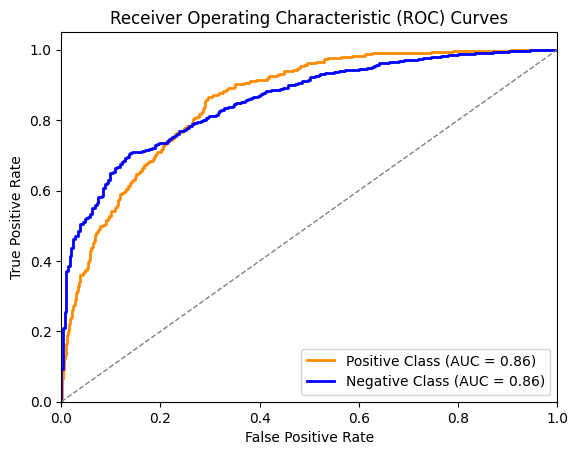

In [53]:
# Get predicted probabilities for both classes
y2_pred_proba = xgb_classifier.predict_proba(x2_test)

# Calculate the ROC curve for both classes
fpr_positive, tpr_positive, _ = roc_curve(y1_test, y2_pred_proba[:, 1], pos_label=1)
fpr_negative, tpr_negative, _ = roc_curve(y1_test, y2_pred_proba[:, 0], pos_label=0)

# Calculate the ROC AUC for both classes
roc_auc_positive = auc(fpr_positive, tpr_positive)
roc_auc_negative = auc(fpr_negative, tpr_negative)

# Plot the ROC curves for both classes
plt.figure()
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=2, label=f'Positive Class (AUC = {roc_auc_positive:.2f})')
plt.plot(fpr_negative, tpr_negative, color='blue', lw=2, label=f'Negative Class (AUC = {roc_auc_negative:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

## SVM

In [54]:
# Calculate class proportions
negative_samples = (y2_train == 0).sum()
positive_samples = (y2_train == 1).sum()
class_weights = {0: 1, 1: negative_samples / positive_samples}

# Create an SVM classifier with class weights
svm_classifier = SVC(class_weight=class_weights,probability=True, random_state=42)

In [55]:
# Train the model on the training data
svm_classifier.fit(x2_train, y2_train)

# Make predictions on the test data
y2_pred = svm_classifier.predict(x2_test)

# Evaluate the model's performance
print(classification_report(y2_test, y2_pred))

accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y2_test, y2_pred)

print("Confusion Matrix:")
print(confusion)

              precision    recall  f1-score   support

           0       0.98      0.74      0.85      4149
           1       0.18      0.82      0.30       295

    accuracy                           0.75      4444
   macro avg       0.58      0.78      0.57      4444
weighted avg       0.93      0.75      0.81      4444

Accuracy: 0.7481998199819982
Confusion Matrix:
[[3084 1065]
 [  54  241]]


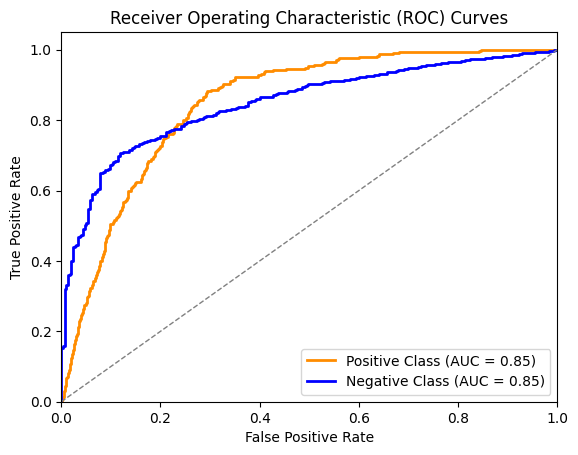

In [56]:
# Get predicted probabilities for both classes
y2_pred_proba = svm_classifier.predict_proba(x2_test)

# Calculate the ROC curve for both classes
fpr_positive, tpr_positive, _ = roc_curve(y1_test, y2_pred_proba[:, 1], pos_label=1)
fpr_negative, tpr_negative, _ = roc_curve(y1_test, y2_pred_proba[:, 0], pos_label=0)

# Calculate the ROC AUC for both classes
roc_auc_positive = auc(fpr_positive, tpr_positive)
roc_auc_negative = auc(fpr_negative, tpr_negative)

# Plot the ROC curves for both classes
plt.figure()
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=2, label=f'Positive Class (AUC = {roc_auc_positive:.2f})')
plt.plot(fpr_negative, tpr_negative, color='blue', lw=2, label=f'Negative Class (AUC = {roc_auc_negative:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

In [57]:
# Calculate class proportions
negative_samples = (y2_train == 0).sum()
positive_samples = (y2_train == 1).sum()
class_weights = {0: 1, 1: negative_samples / positive_samples}

# Create a Logistic Regression classifier with class weights
logreg_classifier = LogisticRegression(class_weight=class_weights, random_state=42)


In [58]:
# Train the model on the training data
logreg_classifier.fit(x2_train, y2_train)

# Make predictions on the test data
y2_pred = logreg_classifier.predict(x2_test)

# Evaluate the model's performance
print(classification_report(y2_test, y2_pred))

accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y2_test, y2_pred)

print("Confusion Matrix:")
print(confusion)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      4149
           1       0.17      0.71      0.28       295

    accuracy                           0.75      4444
   macro avg       0.57      0.73      0.56      4444
weighted avg       0.92      0.75      0.81      4444

Accuracy: 0.7515751575157515
Confusion Matrix:
[[3130 1019]
 [  85  210]]


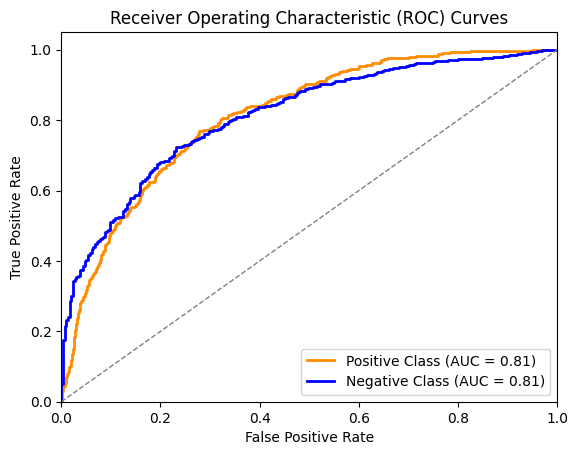

In [59]:
# Get predicted probabilities for both classes
y2_pred_proba = logreg_classifier.predict_proba(x2_test)

# Calculate the ROC curve for both classes
fpr_positive, tpr_positive, _ = roc_curve(y1_test, y2_pred_proba[:, 1], pos_label=1)
fpr_negative, tpr_negative, _ = roc_curve(y1_test, y2_pred_proba[:, 0], pos_label=0)

# Calculate the ROC AUC for both classes
roc_auc_positive = auc(fpr_positive, tpr_positive)
roc_auc_negative = auc(fpr_negative, tpr_negative)

# Plot the ROC curves for both classes
plt.figure()
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=2, label=f'Positive Class (AUC = {roc_auc_positive:.2f})')
plt.plot(fpr_negative, tpr_negative, color='blue', lw=2, label=f'Negative Class (AUC = {roc_auc_negative:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


Random Forest:

High Accuracy (93.31%): Random Forest performs well in correctly classifying instances overall.
Class 0 (No subscription): High precision (0.94) and recall (1.0) indicate that the model accurately identifies non-subscribers.
Class 1 (Subscription): Low precision (0.47) and recall (0.06) suggest that the model has difficulty identifying subscribers, leading to a low F1-score (0.10).
Confusion Matrix: High number of false negatives (FN) for class 1 indicates that the model misses a significant portion of actual subscribers.

Gradient Boosting Algorithms:

Good Accuracy (87.08%): Gradient Boosting provides balanced performance between precision and recall.
Class 0: High precision (0.96) and recall (0.90) indicate accurate identification of non-subscribers.
Class 1: Low precision (0.26) and recall (0.53) suggest moderate performance in identifying subscribers.
Confusion Matrix: Still a notable number of false negatives (FN) for class 1, indicating room for improvement.

Support Vector Machines (SVM):

Moderate Accuracy (74.84%): SVM provides a trade-off between accuracy, precision, and recall.
Class 0: High precision (0.98) and recall (0.74) show accurate identification of non-subscribers.
Class 1: Low precision (0.19) and high recall (0.82) suggest challenges in correctly identifying subscribers.
Confusion Matrix: Still a significant number of false negatives (FN) for class 1.

Logistic Regression:

Moderate Accuracy (75.13%): Logistic Regression provides relatively balanced performance.
Class 0: High precision (0.97) and moderate recall (0.75) indicate accurate identification of non-subscribers.
Class 1: Low precision (0.17) and recall (0.71) suggest challenges in identifying subscribers.
Confusion Matrix: Moderate number of false negatives (FN) for class 1.

# Resampleing : SMOTE (Synthetic Minority Over-sampling Technique) 

In [60]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x1_train_resampled, y1_train_resampled = smote.fit_resample(x1_train, y1_train)

# Train a Gradient Boosting model on the resampled training data
model = xgb.XGBClassifier(random_state=42)
model.fit(x1_train_resampled, y1_train_resampled)

# Make predictions on the test data
y_pred = model.predict(x1_test)

# Evaluate the model's performance
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      4149
           1       0.25      0.82      0.38       295

    accuracy                           0.82      4444
   macro avg       0.62      0.82      0.64      4444
weighted avg       0.94      0.82      0.86      4444



In [61]:
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y1_test, y1_pred)

print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8222322232223223
Confusion Matrix:
[[3411  738]
 [  52  243]]


In [62]:
print("Class distribution before SMOTE:", y1_train.sum(), "Yes and", len(y1_train) - y1_train.sum(), "No")
print("Class distribution after SMOTE:", y1_train_resampled.sum(), "Yes and", len(y1_train_resampled) - y1_train_resampled.sum(), "No")

Class distribution before SMOTE: 1192 Yes and 16582 No
Class distribution after SMOTE: 16582 Yes and 16582 No


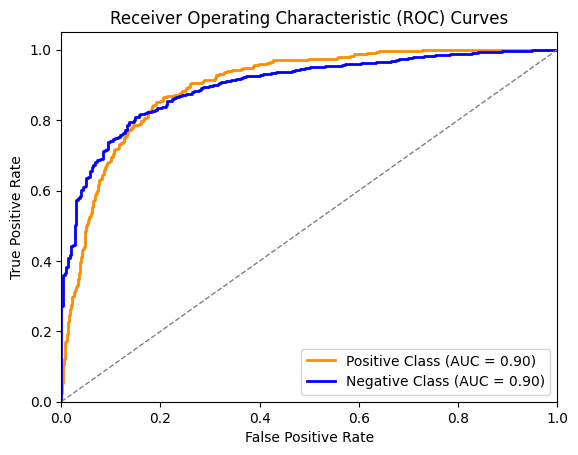

In [63]:
# Get predicted probabilities for both classes
y1_pred_proba = model.predict_proba(x1_test)

# Calculate the ROC curve for both classes
fpr_positive, tpr_positive, _ = roc_curve(y1_test, y1_pred_proba[:, 1], pos_label=1)
fpr_negative, tpr_negative, _ = roc_curve(y1_test, y1_pred_proba[:, 0], pos_label=0)

# Calculate the ROC AUC for both classes
roc_auc_positive = auc(fpr_positive, tpr_positive)
roc_auc_negative = auc(fpr_negative, tpr_negative)

# Plot the ROC curves for both classes
plt.figure()
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=2, label=f'Positive Class (AUC = {roc_auc_positive:.2f})')
plt.plot(fpr_negative, tpr_negative, color='blue', lw=2, label=f'Negative Class (AUC = {roc_auc_negative:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()